<a href="https://colab.research.google.com/github/Aragnzlz/SIMULACION-II/blob/main/Greiwank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import scipy.stats as st
from itertools import accumulate
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
import math

In [41]:
def Griewank(X, Y):
    """
    Bivariate Gaussian distribution for equal shape *X*, *Y*.
    See `bivariate normal
    <http://mathworld.wolfram.com/BivariateNormalDistribution.html>`_
    at mathworld.
    """
    Xmu = X
    Ymu = Y
    f = (X**2+Y**2)/4000 - (np.cos(X)+1)*(np.cos(Y/2**(1/2)) + 1)
    return f



def plot_dist(x,y):
    ''' plotting environment we frequently use to visualise the
    sampling algorithms.'''

    sns.set_style('white')
    plt.rcdefaults()

    # plot contour
    g = sns.JointGrid(x=x, y=y, height=10).plot_joint(sns.kdeplot, n_levels=4, cmap="BuPu", shade=True, shade_lowest=False)

    # add scatter plot of data
    g = g.plot_joint(plt.scatter, c="r", s=30, linewidth=1)
    plt.plot(x, y, linestyle='-', marker='', alpha=0.4, )

    # set axis labels
    g.set_axis_labels("$X$", "$Y$")

def traceplot(x):
    '''traceplot in the x-dimension with the cumulative mean (r)
    and the actual mean (--)'''
    sns.tsplot(x)
    l = list(accumulate(x))
    nl = [v/i for i, v in enumerate(l,1)]
    plt.plot(nl, 'r')
    plt.axhline(y=0.0, color='k', linestyle='--')
    plt.ylabel('x')
    plt.xlabel('Iteration')

def autocorrelation_plot(x, l):
    '''plots the autocorrelation of x to lag = l'''
    plt.acorr(x - np.mean(x), maxlags=l,  normed=True, usevlines=False);
    plt.xlim((0, 100))
    plt.ylabel('Autocorrelation')
    plt.xlabel('Lag')


In [42]:
# set mean and covariance for Q
mean = np.array([0, 1])
var = np.array([[1, .5], [.5, 1]])

Text(0.5, 0, '$\\pi(x,y)$')

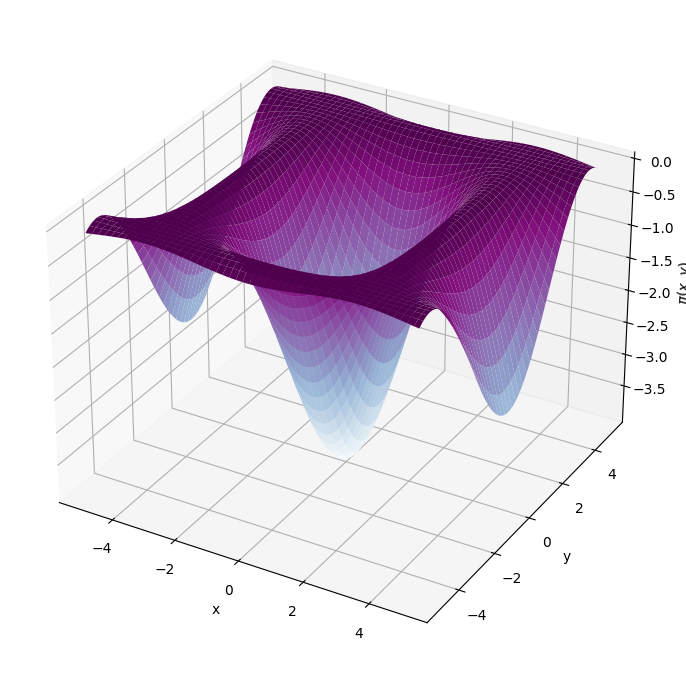

In [43]:
# create grid for 3D plot
x, y = np.linspace(-5, 5, 200), np.linspace(-5, 5, 200)
X,Y = np.meshgrid(x, y)

# generate bivariate normal
Z = Griewank(X,Y)

# plot surface in 3D
fig = plt.figure(figsize=(12,8.5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap= 'BuPu')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$\pi(x,y)$')

### Definimos la 2D distribución objetivo:

In [48]:
def ptarget(x, y):
  x = x
  y = y
  return Griewank(x, y)

### Construimos un método para el algoritmo Metropolis-Hastings, sus parámetros de entrada serán:
- p: distribución objetivo
- n: número de iteraciones del algoritmo
- x0, y0: punto de partida.
- step: tamaño del paso

In [49]:
def metropolis_hastings(p, n, x0, y0, step):
    x = x0
    y = y0

    points = np.zeros((n, 2)) # Lista inicial de muestras, al momento, con puros ceros

    for i in range(n):

        # Proponemos nuevos valores para el estado actual mediante el muestreo Q(x',y' | x,y)
        x_star, y_star = np.array([x, y]) + np.random.normal(scale=step,size=2)

        # Condición de Metropolis-Hastings // en este paso de elimina la constante para cumplir la condicion de normalidad.
        if np.random.rand() < p(x_star, y_star) / p(x, y):
            x, y = x_star, y_star

        # Se actualiza la lista de muestras
        points[i] = np.array([x, y])

    return points

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


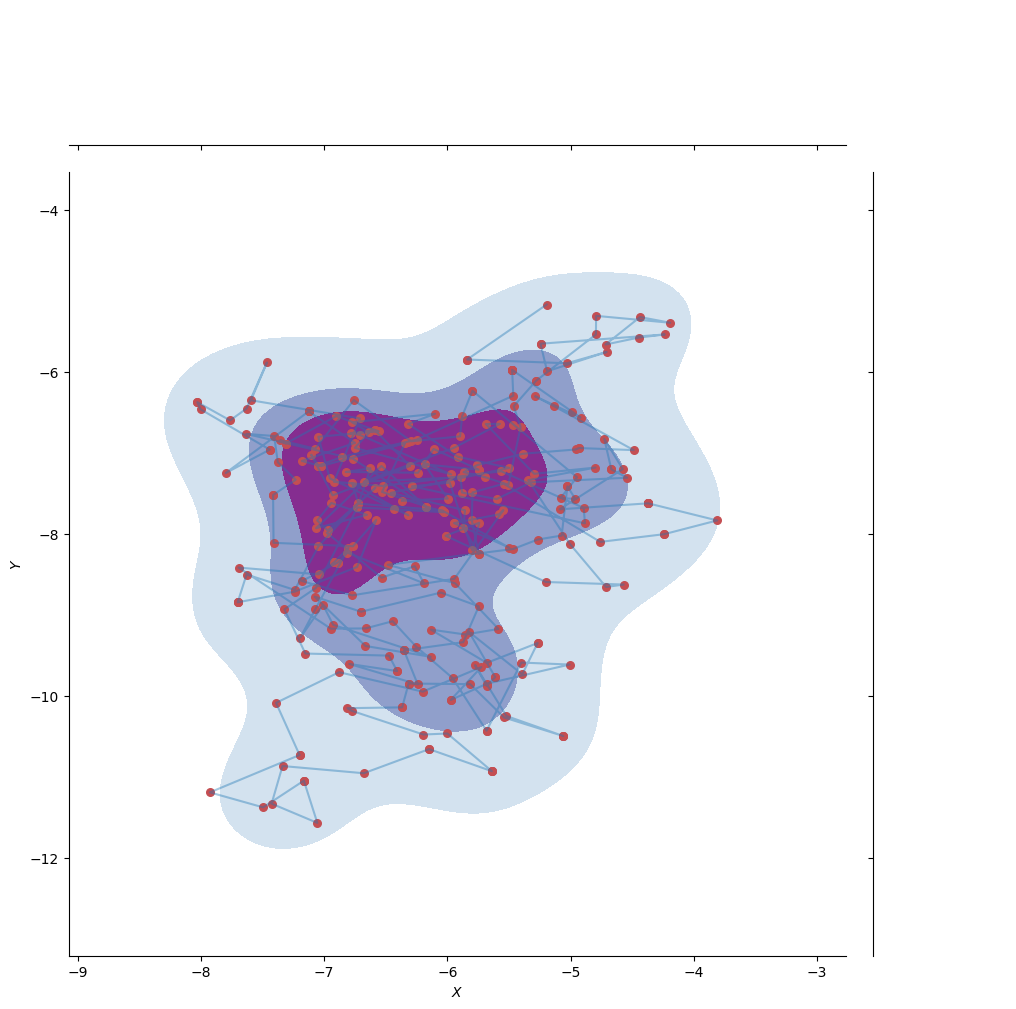

In [50]:
# generate the samples
samples = metropolis_hastings(ptarget, 300, -5, -5, 0.4)

# visualise
plot_dist(samples[:, 0], samples[:, 1])
plt.savefig('caminates.png')